<a href="https://colab.research.google.com/github/mongmongmingming/DongStudy/blob/main/ex02)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_2%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자의 데이터를 바탕으로 해당 환자가 유방암인지 아닌지를 구분하는 신경망 모델을 만들어보자 !

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn에서 지원해주는 학습용 유방암 데이터셋 임포트
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 문제
X = data['data']
# 정답
y = data['target']

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


### 인공신경망 모델링
- 1. 신경망 구조 설계
- 2. 학습 및 평가방법 설정
- 3. 학습 및 시각화
- 4. 모델평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화 함수(들어온 자극(데이터)에 대한 응답 여부를 설정하는 함수)
model.add(Dense(16, input_dim = 30, activation = 'sigmoid'))

# 중간층
model.add(Dense(8, activation = 'sigmoid')) # 하나의 층
model.add(Dense(4, activation = 'sigmoid')) # 하나의 층

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화 함수는 sigmoid로 고정)
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                496       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 학습 및 평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수
# -> 오차의 평균을 구하는 것은 mse와 같지만 0~1사이값(분류를 편하게 하기 위해)으로 변환 후 평균오차를 구해냄
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam', # 최적화함수 : 확률적 경사하강법(SGD) 활용, 최적화 알고리즘(Adam) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

In [ ]:
h = model.fit(X_train, y_train,
              epochs = 200
              )

Epoch 1/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3163 - acc: 0.8944
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.3148 - acc: 0.8967
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3200 - acc: 0.8897
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3150 - acc: 0.9038
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3125 - acc: 0.9014
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3119 - acc: 0.9061
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3133 - acc: 0.9061
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3105 - acc: 0.9038
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3111 - acc: 0.8991
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3099 - acc: 0.9061
Epoch 11/200
14/14 [==============================] - 0s 2m

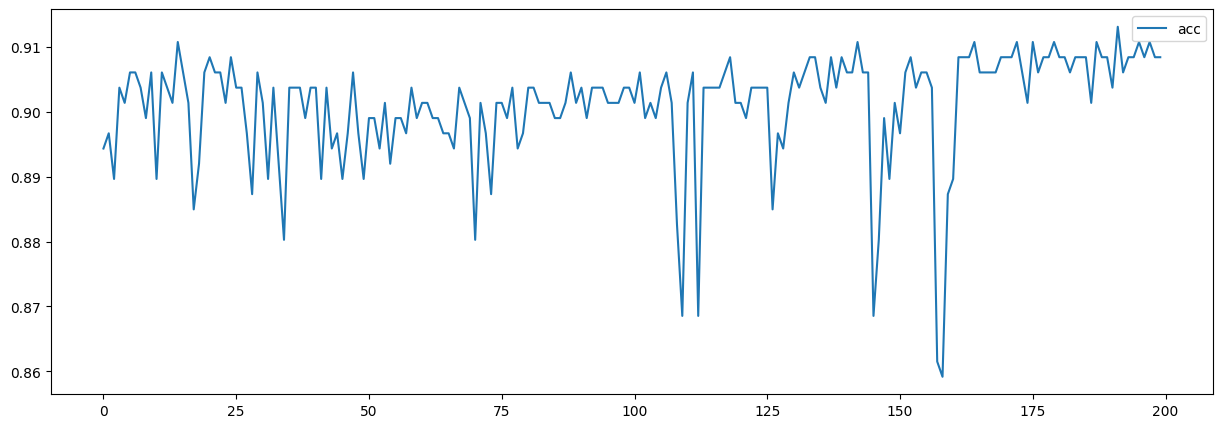

In [ ]:
# 3. 시각화
plt.figure(figsize = (15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1970 - acc: 0.9231


[0.1969892531633377, 0.9230769276618958]